<a href="https://colab.research.google.com/github/AriannaGrossi/MLPNS_AGrossi/blob/main/NN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creiamo un nuovo NN: sara un perceptron, quindi uno shallow NN (non siamo ancora nel deep learning). Lo creiamo senza avvalerci di software specifici per NN (non usiamo nè tensorflow, nè pytorch, ma solo numpy), e lo facciamo come single perceptron, quindi come single layer perceptron, non deep learning.


In [ ]:
import numpy as np
import pylab as pl #per visualizzazioni e plot

In [ ]:
#esempio preso da un blog di un datascientist: https://iamtrask.github.io/2015/07/12/basic-python-network/
#e lo riproduciamo insieme con qualche differenza

In [ ]:
#creo un set di input features, un set molto piccolo di osservazioni e variabili:
#creo un set di 4 osservazioni, 4 oggetti e a ciascuno assegno 3 variabili, e per restare
#nel campo più semplice possibile le variabili sono booleane. Lo creo come un array di forma 4x3,
#cioè sarà una lista di 3 variabili per ciascuna delle mie osservazioni, con 4 osservazioni.
#Qui potrei mettere le variabili che voglio in teoria, ma, visto che creiamo un modello molto 
#piccolo e instabile, non ci garantisce che venga lo stesso risultato: infatti sa con i dati e le
#inizializzazioni che ha dato lei converge, altrimenti potrebbe non convergere e non perchè ci siano errori nel codice
X=np.array(
    [[0,0,1],
     [1,1,1],
     [1,0,1],
     [0,1,1]])

(-0.5, 2.5, 3.5, -0.5)

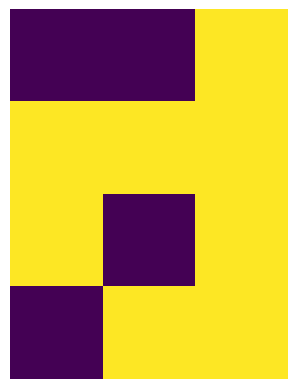

In [ ]:
#Set di variabili, di dati molto limitato, ma vediamolo graficamente: feature space molto semplice
#Questi sono quindi i miei input dati
pl.imshow(X)
pl.axis("off")

In [ ]:
#Output: 4 variabili, 4 predizioni...uso un array e una lista
#La creo come una variabile 1x4 e poi la traspongo cosi che sia un vettore con questa forma
#(lo creo in questo modo solo per comodità)
y=np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

In [ ]:
y.shape#controlliamo la forma

(4, 1)

In [ ]:
print("input\n", X)
print("output\n", y)
#L'idea è di predirre 0,1,1,0 sulla base dell'input sotto, della matrice plottata sopra, e lo posso
#fare con un single layer perceptron

input
 [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output
 [[0]
 [1]
 [1]
 [0]]


#Basic architecture: 1 layer

Creo l'architettura a 1 layer, cioè ho solo un set di neuroni a cui vengono passati i dati e che vanno direttamente a predirre il risultato, cioè sto implementando la slide sul perceptron, con 3 variabili in input, e 4 esempi che gli passo per imparare quale è l'ottimizzazione dei weights e dei biases (del singolo bias perchè ho solo un layer)
Quindi la mia architettura base sono:
4 osservazioni (in realtà non è parte della architettura)

3 neuroni

1 layer

In [ ]:
#activation function: i pesi e i bais vengono imparati, l'altro elemento della architettura del NN
#di cui ho bisogno è la activation function, per cui devo scrivere una funzione che prenda la linear
#regression che faccio con i pesi e i biases e la passi alla activation function, che mi darà
#un risultato probabilistico, quindi non mi aspetto che i miei risultati di questo modello siano 1 e 0,
#ma numeri tra 1 e 0 che posso intepretare come probabilità, e che poi posso convertire su 1 e 0 stabilendo
#una treshold, come abbiamo fatto nel caso del RM, quando abbiamo fatto la ROC
#Creo il sigmoid: è già definito in diversi pacchetti e potrei usare numpy o scipy per crearlo, ma 
#la creiamo noi sulla base della formula delle slides
def sigmoid(x):
  return 1./(1.+np.exp(-x))


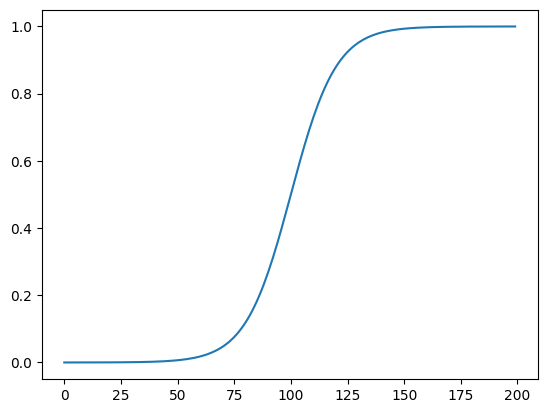

In [ ]:
pl.plot(sigmoid(np.arange(-10,10,0.1)))
#facciamo un test per vedere di averla creata giusta, per vedere che il grafico abbia l'aspetto giusto
#Ora che ho l'activation function devo creare l'architettura

In [ ]:
#loss function: c'è una cosa di cui ho bisogno per imparare, all'interno del ML sempre,
#ed è definire la loss function che utilizzo. prima di creare il network definisco la loss function e le passo
#la predizione, la verità (il target), e usiamo una loss function per datapunto, quindi
#trattiamo ciascun datapunto come se fosse un intero dataset, cioè in questo caso non farò la somma delle distanze
#tra la predizione e la verità, ma voglio ritornare un vettore delle individuali distanze tra
#la predizione e la verità
#Per semplicità usiamo la L1 loss function
#non uso ne il valore assoluto ne la somma,  quindi è una loss function molto semplice e un po
#inconsueta, ma per questo caso funziona meglio
def loss(prediction, target):
  return target-prediction

In [ ]:
def dsigmoid(x):
  return x*(1.-x)
#definisco la derivata della funzione, perchè voglio fare il gradient descent e quindi devo sapere la 
#derivata della activation function (per fortuna ho scelto una activation function che è continua
#ed ha una derivata definita)



#Neural network

Ora ho tutti gli elementi matematici che mi servono, quindi creo il neural network: creo la funzione delle slides e devo assegnare un punto di partenza ai valori che voglio imparare (voglio imparare pesi e biases), per cui assegno un punto di partenza a caso ai miei pesi e poi li ottimizzo usano il gradient descent e sfruttando la misura della loss che ho appena definito

In [ ]:
#Voglio fare un processo di ottimizzazione iterativa, stochastic gradient descent, cioè a ogni 
#passaggio imparo quale è l'errore tra la predizione e il mio risultato, e adatto i pesi a migliorare 
#quell'errore, quindi devo definire un criterio di convergenza: per mantenere semplicità, e lo faremo
#tipicamente sempre con i NN, invece di stabilire un criterio di convergenza, che potrebbe essere rischioso
#perchè non abbiamo molto controllo intuitivo su quale possa essere il risultato, stabiliamo il 
#numero di iterazioni che vogliamo fare: lo facciamo oggi con questo semplice modello, e lo faremo 
#anche quando utilizzeremo keras, tipicamente quando facciamo training di NN decidiamo a priori quante epoche
#Quindi abbiamo un massimo numero di epoche che va settato, e il massimo numero di epoche sarà molto alto
#(anche se poi vedremo che non impariamo niente dopo molte meno epoche di 6000), e lo setto a 6000
training= 6000

In [ ]:
#devo avere un punto di partenza: siccome voglio inizializzare da un punto nel feature space che sia random, come faccio sempre
#nei ML models, e poi imparare da questo punto di partenza i valori corretti per i parametri,
#devo settare un seme altrimenti non è riproducibile
#Metto il seme nella cella dove ho fatto random perchè lo farò andare due o tre volte e voglio
#avere gli stessi numeri
np.random.seed(302)
#creo il mio unico layer of synopses/neurons: i miei layers di neurons sono numpy arrays, quindi
#sto creando numpy arrays che verrano combinate con il dot product con le array iniziali, quindi 
#sto facendo linear algebra, sto risolvendo ciascuna delle regressioni lineari come un sistema di 
#matrici... Quindi se il mio input sono 4x3 e voglio un output che sia 4 predizioni, creo un layer
#di synopses che sia 3 dimensionale (perchè devo moltiplicare il mio 4x3: 4x3 dot 3x1 =4x1 (risultato: 
#4 predizioni per 4 vettori in input, ognuna delle predizioni è dimensione 1))
#Quindi inizializzo il mio primo layer come: (è normalizzato tra -1 e 1, con valori a caso, e lo 
#chiamo synopses0, primo layer di synopses)
#random.random vuol dire che ho creato una distribuzione uniforme di valori, e ovviamente voglio
#che i miei valori siano normalizzati all'interno del range dove mi aspetto che i pesi siano, e 
#quindi non voglio usare in questo caso una gaussiana, che metterebbe tutte le inizializzazioni
#di tutti i pesi vicino allo 0, voglio che siano distribuiti nel range consentito (che non 
#è detto che sia consentito, ma è buona pratica normalizzare i pesi iniziali in un range ragionevole)  
#Avrei potuto inizializzare i pesi tra 0 e 1, ma lasciare la possibilità di pesi negativi, obv i pesi
#possono essere negativi indicando che una variabile in input potrebbe essere inversamente correlata con
#il risultato
syn0= 2*np.random.random((3,1))-1
print(syn0)
print(syn0.shape)

[[ 0.27256242]
 [ 0.65008468]
 [-0.31671053]]
(3, 1)


In [ ]:
#per questo NN ho usato una loss function individuale per ogni osservazione, per cui non è facile
#visualizzarle, perciò creiamo una metrica piu comprensiva della loss function:
#Sposto la cella precedente qui all'interno di questo modello, perchè altrimenti le sinassi
#non sono piu inizializzate come lo erano all'inizio, voglio avere il random seed e l'inizializzazione
#delle sinapsi nella stessa cella del for loop
np.random.seed(302)
syn0= 2*np.random.random((3,1))-1
print(syn0)
print(syn0.shape)

#creo un contenitore: posso fare una lista
loss_output=[]

#Inizio il mio training:
for iter in range(training):
  inputLayer= X #potrei anche metterlo al di fuori del loop, ma è utile all'interno del loop per quando avrò
  #piu layers, quindi anche se ripete la stessa operazione per ogni iterazione del loop (X non cambia
  #ad ogni iterazione del loop), lo tengo all'interno

  #forward propagation: viene fatta attraverso la operazione del dot product tra l'input layer e il mio layer di synapses
  #linear regression (dot product linear algebra solution)
  l1=np.dot(inputLayer, syn0)

  #activation function
  output= sigmoid(l1) #prendo i miei dati, li passo nella linear regression, che è il dot product
  #delle due matrici e passo il risultato della regressione al mio sigmoid function, e questo è il mio output
  #Se non volessi trainare il mio modello avrei finito, ma io voglio trainarlo, e nel training cambio 
  #il valore delle mie synapses, dei pesi nelle synapses
  #Notiamo inoltre che sto assumendo che il bias sia 0 per semplificare il codice

  #calculate error: come calcolo la correzione sui pesi delle sinapsi? prima calcolo l'errore, che è definito dalla 
  #mia funzione loss, alla quale ho passato predizione e target... questo è l'errore
  output_error=loss(output, y)

  #Per ogni iterazione appendiamo alla nostra lista di loss, per semplificare la visualizzazione...
  #non posso appendere output error, perchè è un vettore quadridimensionale...Potrei plottarle tutte, ma 
  #per semplicità creiamo una metrica unica che è la seguente
  loss_output.append(np.abs(output_error).sum())

  #backward propagation

  #calculate correction: come applico la correzione sulla base dell'errore? Moltiplico l'errore per il gradiente
  #della loss function, cioè se sono in una posizione della loss function in cui  
  #prendendo la derivata ho una slope molto elevata, faccio un cambiamento significativo, se sono
  #in una regione piatta faccio un cambiamento piu piccolo...questa è la correzione
  output_delta=output_error*dsigmoid(output)

  #apply correction to weights: ora applico la correzione alle sinapsi (correzione sui pesi)...Questo processo che sto facendo,
  #di correzione tramite gradient descent andando all'indietro dal risultato della predizione, quando abbiamo
  #piu layer (nel caso di un layer è banale), ossia quando facciamo crescere il NN e aggiungiamo hidden
  #layers, aggiungiamo layers di neuroni intermedi tra l'input e l'output si chiama back propagation.
  syn0 += np.dot(inputLayer.T, output_delta) #devo trasporre l'input layer per avere la dimensione corretta

print("output after training", output)
print("output target\n", y)

#Il risultato è vicino allo 0, vicino all'1, vicino all'1, vicino allo 0 ed è probabilisticamente 
#corretto

[[ 0.27256242]
 [ 0.65008468]
 [-0.31671053]]
(3, 1)
output after training [[0.01254551]
 [0.98977455]
 [0.99169035]
 [0.0101995 ]]
output target
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'global loss')

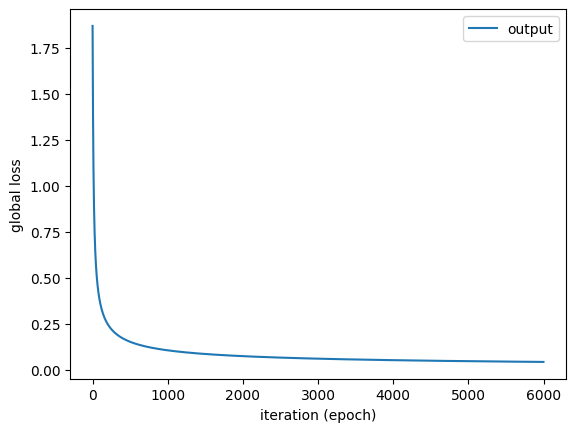

In [ ]:
#Questo è il modo piu canonico di visualizzare la loss, e quando faremo tensorflow i plot delle loss
#function saranno come questo
pl.plot(loss_output, label="output")
pl.legend()
pl.xlabel("iteration (epoch)") #voglio plottare come funzione della iterazione, che si chiama epoca del training
pl.ylabel("global loss") #lo chiamo global loss per chiarire che non è la loss che ho usato nel training, ma 
#una metrica derivata

#Vedo che il mio NN ha imparato benissimo, andando molto velocemente all'inizio (la loss è 
#diminuita enormemente all'inizio) e smettendo di imparare, o rallentando molto i miglioramenti,
#a partire da mille epoche, per cui avrei potuto fare un training di 1000 epoche con minime differenze sul risultato
#e meno costo computazionale

#Due hidden layers
Aggiungere ora 1 o due layers alla architettura che abbiamo creato, fare il plot della loss function e vedere come è, come abbiamo imparato... Quando si fa il plot della loss function, fatelo per entrambi i layers: guardate l'output error del NN overall, e l'errore dell'hidden layer

In [ ]:
#la mia architettura è 4x3 input che passa a 3x5, dove 3 è forzato dal valore dell'input,
#5 è quello che scelgo, e poi il layer successivo, il 5 è forzato e scelgo che abbia 1 neurone
#4x3->3x5->5x1
#quindi ho 5 neuroni intermedi e poi 5x1 così da avere 4x1 in output

#Li inizializzo random come fatto prima (ma con la nuova dimensionalità)
syn0 = 2* np.random.random((3,5)) -1 #noramlized 0-1

syn1 = 2* np.random.random((5,1)) -1 #normalized 0-1


#Preparo due vettori per storare i risultati della mia loss function, perchè voglio 
#monitorare la loss in entrambi i layer
loss_output = []
loss_hidden = []

for iter in range(training):
  input_layer = X  #input layer iniziale

  #forward propagation

  #linear regression (dot product linear algebra solution)
  l1 = np.dot(input_layer,syn0) #primo passaggio identico a sopra: layer 1 è il dot product dell'input
  #con le sinassi, il primo layer di sinapsi, e stavolta lo chiamo hidden layer (questo non è il mio output): 
  #lo passo all'activation function (riga sotto) e questo mi dà il valore dell'hidden layer
  #Il valore dell'hidden layer ha esso stesso una loss, ossia quale è la differenza tra la predizione 
  #finale e l'hidden layer. potrebbe essere alta e può non avere importanza, perchè in realtà l'importanza 
  #è solo l'errore che ho sull'ultimo layer, però la storo qui (in loss hidden) e la monitorerò

  #activations
  hidden =sigmoid(l1) #Il risultato del primo layer passato per la funzione di attivazione
  #l'ho chiamato hidden

  #invece di andare direttamente in output vado al secondo layer: prendo l'output del layer 1, lo passo  
  #al mio secondo set di sinapsi (o dot product) e questo mi dà l2, che poi passo alla funzione 
  #di attivazione che è la stessa (sigmoid, riga sotto), non deve essere la stessa necessariamente, ma 
  #in questo caso lo è
  l2=np.dot(hidden,syn1)#secondo layer

  #activations
  output = sigmoid(l2) #il risultato è output: il secondo layer va direttamente sull'output
  #calcolo l'errore di questo layer, e lo salvo nel vettore loss_output

  output_error = loss(output,y)#calcolo l'errore sull'output allo stesso modo, come la derivata
  #del sigmoid moltiplicata per la loss function
  loss_output.append(np.abs(output_error).sum())

  #back propagation (cioè correggo sulla base dell'errore)

  #calcolo la correzione
  output_delta = output_error * dsigmoid(output) #l'output error corregge l'output layer,
  #quindi output error moltiplicato la derivata del sigmoid per il valore dell'output,
  #cioè modulato sulla base dell'inclinazione del sigmoid al valore dell'output che ho predetto

  #Errore sul primo layer:l'errore sull'hidden layer (???) è quanto contribuisce l'hidden layer all'errore dell'output layer,
  #quindi si calcola come dot product della correzione che faccio sull'output layer per
  #la pendenza dell'hidden layer, per l'hidden layer, che mi dà la slope di questo errore
  hidden_error=output_delta.dot(syn1.T)

  loss_hidden.append(np.abs(hidden_error).sum())

  hidden_delta = hidden_error * dsigmoid(hidden) #hidden layer la stessa cosa, ma sul layer hidden
  #quindi la derivata del sigmoid alla predizione dell'hidden layer moltiplicata per l'errore

  #applico la correzione ai pesi : correzioni che applico sequenzialmente: prima correggo
  #il primo layer con la hidden correction (hidden delta) moltiplicata per l'input layer,
  #e per la seconda moltiplicata per il layer che è input al secondo layer, che è l'output 
  #del primo layer, quindi al seconda viene moltiplicata output delta per hidden
  syn0 += np.dot(input_layer.T, hidden_delta) 
  syn1 += np.dot(hidden.T, output_delta)

print("output after cleanning: ", output)
print("target: ", y)
#lo faccio andare per 6000 epoche: ho imparato più rapidamente la correzione dell'output layer 
#e ho raffinato la correzione dell'input layer, per ottenere un risultato non molto buono, 
#ma può essere corretto con una treshold che mi consente di ottenere il risultato di classificazione 
#esatta, scegliendo per esempio una treshold di 0.7, che è un hyperparameter che mi porta da un modello
#probabilistico ad un modello deterministico

output after cleanning:  [[0.510144  ]
 [0.9608267 ]
 [0.96106004]
 [0.50824105]]
target:  [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'Global Loss')

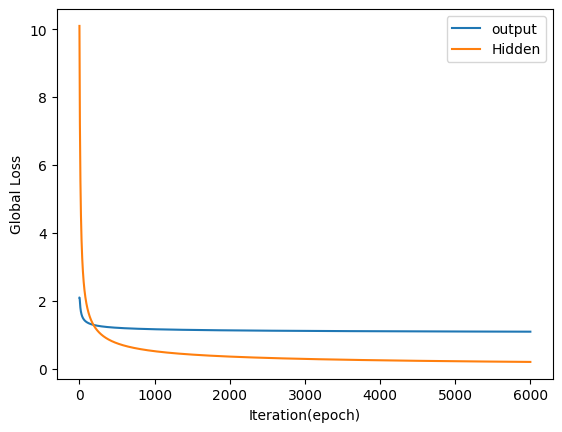

In [ ]:
pl.plot(loss_output, label="output")
pl.plot(loss_hidden, label="Hidden")
pl.plot()
pl.legend()
pl.xlabel("Iteration(epoch)")
pl.ylabel("Global Loss")

Esercizio di creare un NN senza utilizzare nessun python package:
ricordiamo che abbiamo un input 4x3, quindi un vettore di 4 oggetti, ciascuno con 3 variabili, 3 features in input, che possiamo rappresentare come una matrice e abbiamo creato, utilizzato una loss function che è la differenza tra la predizione e il target, abbiamo utilizzato sigmoid come attivazione, abbiamo creato prima un layer e poi due layers per fare il processo delle slides. Lo abbiamo fatto a mano, cioè abbiamo scritto esplicitamente il dot product tra l’hidden layer, il layer dei pesi, dei neuroni e i dati in input, e nel secondo caso abbiamo aggiunto un layer, quindi diventa un deep NN o un multilayer perceptron, e quindi facciamo il dot product due volte, una volta con l’input e una volta con l’output di questa operazione passata per il sigmoid, facciamo di nuovo il dot product con il secondo layer passato per il sigmoid, e poi avevamo il training. Avevamo ottenuto un risultato non ottimo, si può migliorare, ma comunque corretto: infatti se stabiliamo una treshold per classificazione di ciascuno di questi dati in input, 0 e 1, abbiamo ottenuto il risultato corretto con 0 per due valori e 1 per gli altri.
Abbiamo fatto il plot della loss function, lo facciamo sempre almeno dell’output, e vogliamo vedere che ci sia esattamente questo comportamento. 


#2 Layers Neural network con Tensorflow

Vediamo ora come la avremmo scritta con la sintassi di keras, keras tensorflow (in realtà non è esattamente la stessa cosa perchè ci sono ottimizzazioni interne, per cui quando passiamo a keras tensorflow vedremo che anche con la stessa architettura otteniamo un risultato migliore, ma l'esercizio è per vedere come si costruisce con i python packages)

In [ ]:
from tensorflow import keras
#importiamo tensorflow, keras è il modello, tensorflow è il pacchetto che contiene 
#la struttura per fare i modelli neurali e altri elementi di visualizzazione, ottimizzazione ecc
#L'altro pacchetto molto comune è pytorch

In [ ]:
#Come ho fatto prima a mano, voglio creare i miei layers: keras contiene il modello, sottopacchetto
#layers, che conterrà tutti i tipi di layers di reti neurali tipici che posso volere utilizzare
#(esempio convolutional layers, multilayer perceptron, che è il layer più semplice che utilizziamo
#ed è il corrispondente di quello che abbiamo creato in questo modello) 
#Quando vogliamo fare connessioni dense, cioè se vogliamo connettere tutti i valori in
#input a ciascuno dei neuroni nel prossimo layer il tipo di modello che utilizziamo
#è dense, il tipo di layer che utilizziamo è dense. Quindi dense è un dense multilayer perceptron
#Gli argomenti dei layer dipendono dal tipo di layer che utilizziamo, per il dense è semplicemente
#il numero di neuroni che voglio nel mio layer.
#Faccio la stessa architettura che abbiamo fatto quando abbiamo fatto l'esercizio a mano:
#5 neuroni nel primo layer, e quindi nel secondo layer un neurone per avere l'output corretto
#Il mio input dati era 4x3, 5 neuroni nel primo layer e 1 neurone nel secondo layer per andare all'output
#input dim è l'altro argomento che voglio usare
#Mentre prima avevo creato il vettore dei pesi separatamente, qui creo il layer
#nella sua interità e quindi devo dire quale è la funzione di attivazione (come la abbiamo usata prima)
#Questo è l'hidden layer
hlayer = keras.layers.Dense(5, input_dim=3, activation="sigmoid")

#Creo ora l'output layer: tratto il problema come un problema di regressione, per cui voglio avere solo
#un neurone in output, in alternativa avrei potuto trattare questo problema come un problema di classificazione
#e mettere due neuroni in output, uno che dice 0 uno che dice 1
#Siccome non funziona bene se faccio regressione e gli dò una attivazione tipo sigmoid
#scelgo la attivazione lineare
olayer = keras.layers.Dense(1, activation="linear")

#Il modello viene creato dalla funzione keras.sequential, sequential perchè questo è un sequential feedforward
#NN, ci sono reti neurali dove le informazioni possono essere trattate in maniera circolare, ad esempio
#recurrent NN, che funzionano per time series analysis, analisi di dati temporali, in questo caso
#andiamo in una sola direzione, cioè prendo i dati in input e vado solo in una direzione, non ho nessun
#loop o connessione tra layer precedenti e layer che vengono dopo, vado in una direzione 
#nella predizione e nella direzione opposta per il back propagation training
#Il modello viene creato dandogli una lista dei layer che ho creato (non è l'unico modo
#di creare un modello, c'è anche la funzione model.build che mi consente di crearlo in maniera diversa
#passando diversi argomenti alla funzione, ma è solo una funzione che facilita la creazione di layer 
#di questo tipo)
#Sequential come argomento prende la lista dei layer che ho creato
model = keras.Sequential([hlayer, olayer])

#per vedere il mio modello uso model.summary, che mi dà una visualizzazione di una tabella, che 
#mi dice ciascuno dei layer che ho utilizzato, quale è la dimensione e quanti parametri ha.
#Quindi il nostro modello che abbiamo creato con solo un hidden layer ha 26 parametri (i modelli
#che trattiamo con NN sono modelli con un alto numero di parametri)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Dopo che ho creato il modello ho la compilazione del modello, e quando lo compilo devo 
#fare tutte le mie altre scelte architettoniche (alcune delle quali avevo fatto prima, altre no)
#Una di quelle che avevo fatto era la scelta della loss function: utilizziamo the mean absolute error (mae)
#in questo caso, che è un po' diversa da quella di prima, ma funziona bene con questo modello.
#se volessi vedere quali sono le loss functions disponibili potrei andare su keras losses,
#e sono tutte classi, variabili complesse, oggetti all'interno di python.
#L'altra cosa che scelgo sono i parametri del training, come voglio fare il training, cioè
#quale è lo specifico tipo di gradient descent algorithm (algoritmo per il gradient descent) che voglio 
#utilizzare per fare l'ottimizzazione. Un modello tipico è adam
#Devo dire alla mia ottimizzazione quale è la metrica che voglio utilizzare: posso usare 
#the mean absolute error, ma preferisco passargli l'accuracy (che penso sia la stessa cosa del mean absolute error)
#(lo scrivo così solo perchè sono sicura che così converge)
#Queste sono tutte scelte di hyperparametri che possiamo cambiare, per vedere a quali siamo sensibili
#e quali sono importanti
#monitoriamo più di una metrica (accuracy e mae) e vediamo cosa succede 
model.compile(loss = "mae", optimizer="adam", metrics=["accuracy", "mae"])

In [ ]:
#fitto il modello ai dati: questo esercizio è fittizio, non ho un training set e un test set
#ho solo un vettore di 4 osservazioni, per cui è un eserczio solo per esplorare la sintassi che
#utilizziamo
#Gli passo i dati in input, che era la variabile X, e gli passo il target, che era la variabile y,
#e gli dico per quante epoche fare andare il NN
model.fit(X, y, epochs=1000)

#Quello che keras riporta è la loss function, quindi è quello che sto monitorando per fare 
#l'ottimizzazione, e tutte le altre metriche che gli ho chiesto (accuratezza e mae)
#Vediamo che scende (la loss function), ma l'accuracy non migliora, ma comincerà a migliorare ad
#un certo punto (dal 75% al 100%)

#Visto che gli ho detto di farlo andare per mille epoche lo fa andare per mille epoche, anche 
#se non c'è più miglioramento nelle ultime epoche


Epoch 1/1000
1/1 [==============================] - 1s 802ms/step - loss: 0.4386 - accuracy: 0.7500 - mae: 0.4386
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.4381 - accuracy: 0.7500 - mae: 0.4381
Epoch 3/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.4375 - accuracy: 0.7500 - mae: 0.4375
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.4370 - accuracy: 0.7500 - mae: 0.4370
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.4365 - accuracy: 0.7500 - mae: 0.4365
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.4359 - accuracy: 0.7500 - mae: 0.4359
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.4354 - accuracy: 0.7500 - mae: 0.4354
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.4349 - accuracy: 0.7500 - mae: 0.4349
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.4343 - accuracy: 0.75

In [ ]:
model.predict(X)
#Chiedo di fare una predizione: questo è un esercizio fittizio, per cui ora faccio
#la predizione sul mio traning data: so già che ho una ccuratezza del 100% per cui so
#già che il risultato sarà buono (ovviamente avrei dovuto avere un training e test set) 
#Ottengo un risultato praticamente esattamente corretto, ricordandoci cosa era y (cella sotto)

1/1 [==============================] - 0s 77ms/step


array([[-3.3443421e-04],
       [ 9.9977994e-01],
       [ 9.9939573e-01],
       [-5.6570023e-04]], dtype=float32)

In [ ]:
y

array([[0],
       [1],
       [1],
       [0]])

Abbiamo visto come si costruisce il modello matematicamente e come si implementa la matematica del multilayer perceptron, e ora abbiamo visto come crearlo con ? software, che è già available come python.